In [1]:
cd /home/g.samarth/globalHelioseismology/src

/home/g.samarth/globalHelioseismology/src


In [2]:
import globalHelioseismology as GH

In [9]:
GH.spectra.crossSpectra(5, 50, 5, 52, 0)
GH.spectra.crossSpectra(5, 50, 5, 54, 0)
GH.spectra.crossSpectra(5, 51, 5, 53, 0)
GH.spectra.crossSpectra(5, 51, 5, 55, 0)

freqmin = 1960.6661151920289; freqmax = 2252.2663720550563
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6616.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_052_6616.fits
Storing /scratch/g.samarth/globalHelioseismology/csdata_05/variance_n_05.050-05.052.npy
freqmin = 1959.3801162642978; freqmax = 2280.55834846514
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_054_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_050_6400.fits
Rea

In [ ]:
n1, ell1 = 0, 200
n2, ell2 = n1, ell1+2
t = 0
ell2_arr = np.array([ell1, ell1+2, ell1+4])
for ell2 in ell2_arr:
    for t in range(8):
        cs = GH.spectra.crossSpectra(n1, ell1, n2, ell2, t)

freqmin = 1259.4751998466465; freqmax = 1593.0311717269008
Reading /scratch/seismogroup/data/HMI/data/HMI_200_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_200_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_200_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_200_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_200_6616.fits
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/csp_data_00.200-00.200.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/csm_data_00.200-00.200.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/variance_p_00.200-00.200.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/variance_n_00.200-00.200.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/bsl_p_00.200-00.200.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/bsl_n_00.200-00.200.npy
freqmin = 1259.4751998466465; freqmax = 1593.0311717269008
Reading /scratch/seismogroup/data/HMI/data/HMI_200_6328.fits
Reading 

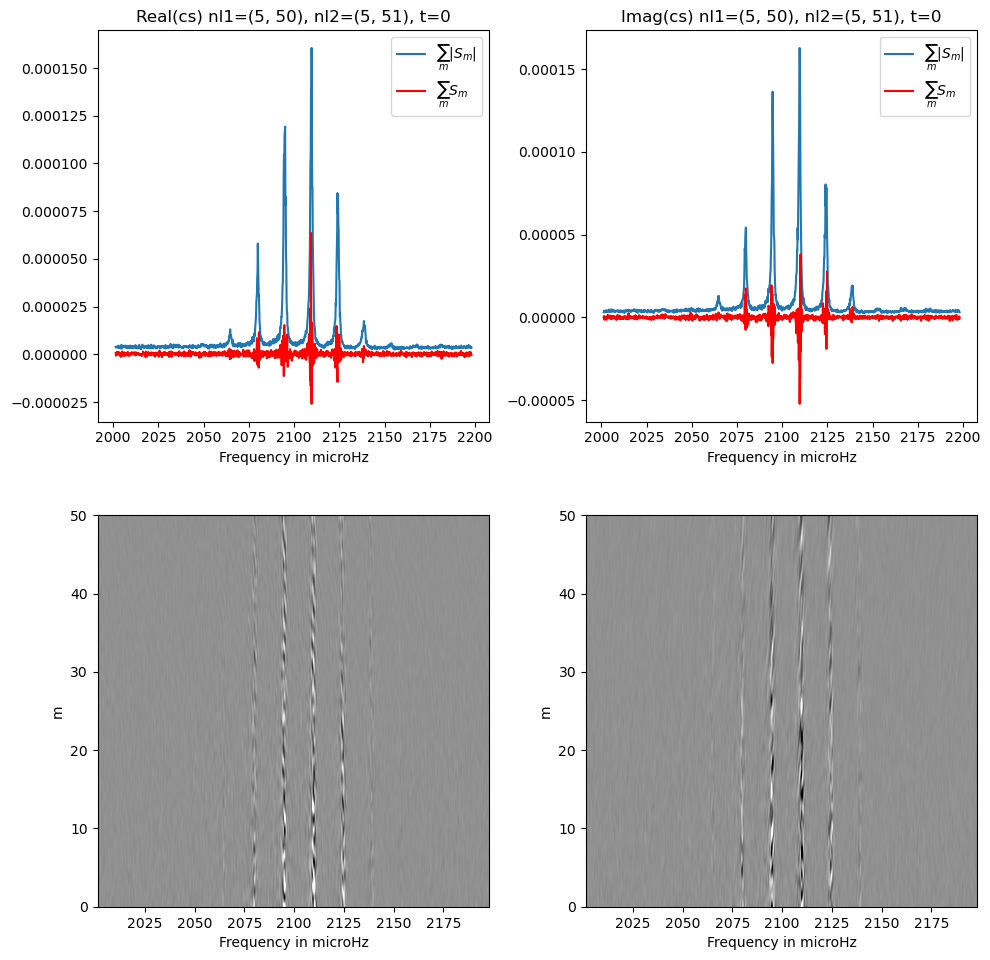

In [50]:
if abs(t)>0:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}_{abs(t):03d}.npy"
else:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}.npy"
csp = np.load(f"/scratch/g.samarth/globalHelioseismology/csdata_{n1:02d}/csp_data_{suffix}")
freqp = cs.freq_p[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(freqp, abs(csp.real).sum(axis=0), label='$\sum_m |S_m|$')
axs[0].plot(freqp, csp.real.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[0].set_xlabel('Frequency in microHz')
axs[0].set_title(f'Real(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[0].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[0].set_aspect(1.0/axs[0].get_data_ratio())
axs[0].legend()

axs[1].plot(freqp, abs(csp.imag).sum(axis=0), label='$\sum_m |S_m|$')
axs[1].plot(freqp, csp.imag.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[1].set_xlabel('Frequency in microHz')
axs[1].set_title(f'Imag(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[1].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[1].set_aspect(1.0/axs[1].get_data_ratio())
axs[1].legend()

fac = 5.
vmaxr, vminr = csp.real.max()/fac, csp.real.min()/fac
vmaxi, vmini = csp.imag.max()/fac, csp.imag.min()/fac
freqdiff = freqp.max() - freqp.min()
aspectrat = freqdiff/ell1
axs[2].imshow(csp.real, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, ell1], interpolation='bessel')
axs[2].set_xlabel('Frequency in microHz')
axs[2].set_ylabel('m')

axs[3].imshow(csp.imag, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, ell1], interpolation='bessel')
axs[3].set_xlabel('Frequency in microHz')
axs[3].set_ylabel('m')
plt.tight_layout()
plt.show()

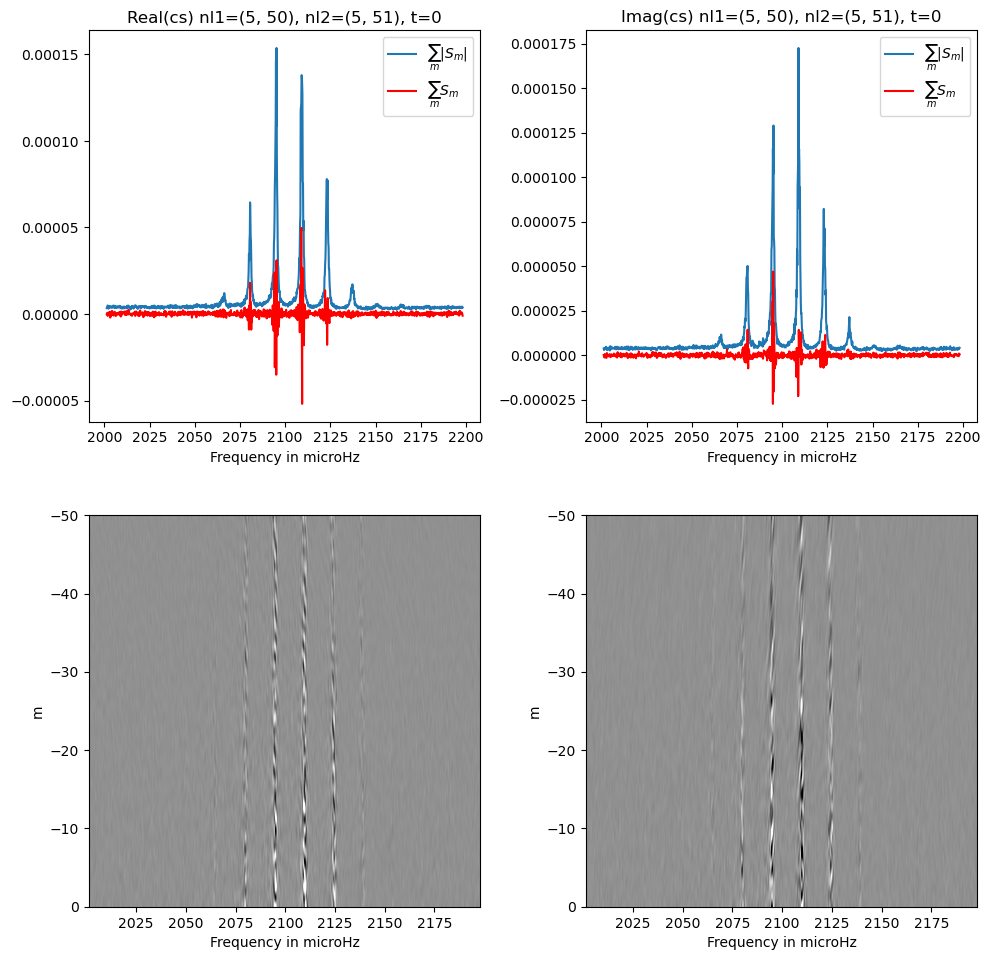

In [51]:
if abs(t)>0:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}_{abs(t):03d}.npy"
else:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}.npy"
csn = np.load(f"/scratch/g.samarth/globalHelioseismology/csdata_{n1:02d}/csm_data_{suffix}")
freqp = cs.freq_n[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(freqp, abs(csn.real).sum(axis=0), label='$\sum_m |S_m|$')
axs[0].plot(freqp, csn.real.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[0].set_xlabel('Frequency in microHz')
axs[0].set_title(f'Real(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[0].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[0].set_aspect(1.0/axs[0].get_data_ratio())
axs[0].legend()

axs[1].plot(freqp, abs(csn.imag).sum(axis=0), label='$\sum_m |S_m|$')
axs[1].plot(freqp, csn.imag.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[1].set_xlabel('Frequency in microHz')
axs[1].set_title(f'Imag(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[1].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[1].set_aspect(1.0/axs[1].get_data_ratio())
axs[1].legend()

fac = 5.
vmaxr, vminr = csp.real.max()/fac, csp.real.min()/fac
vmaxi, vmini = csp.imag.max()/fac, csp.imag.min()/fac
freqdiff = freqp.max() - freqp.min()
aspectrat = freqdiff/ell1
axs[2].imshow(csp.real, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, -ell1], interpolation='bessel')
axs[2].set_xlabel('Frequency in microHz')
axs[2].set_ylabel('m')

axs[3].imshow(csp.imag, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, -ell1], interpolation='bessel')
axs[3].set_xlabel('Frequency in microHz')
axs[3].set_ylabel('m')
plt.tight_layout()
plt.show()